# Assignment 01 
## KOIDALA SURYA PRAKASH
## EE18BTECH11026

In [8]:
## imports

import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d
import pandas as pd

## Q1 

Sample Mean =  1.494639046360198
Sample Variance =  0.24414119646662444
Skewness =  -0.007587025692646394
Kurtosis =  -0.10453605454597881
Standard deviation using MAD =  0.7382260870919113
Standard deviation using sigma_{G} =  0.4941064626845356


Text(0.5, 1.0, 'Normal Distribution PDF')

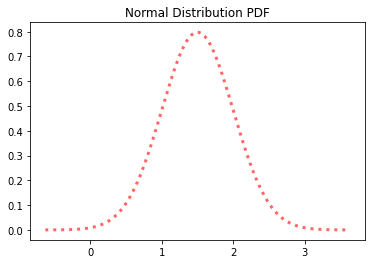

In [8]:
dobj = sp.norm(loc= 1.5, scale = 0.5)  # normal distribution

samples = dobj.rvs(size= 1000) # draw samples from the distribution

print("Sample Mean = ", sp.tmean(samples))
print("Sample Variance = " ,sp.tvar(samples))
print("Skewness = ", sp.skew(samples))
print("Kurtosis = " , sp.kurtosis(samples))
print("Standard deviation using MAD = " , 1.4826*sp.median_absolute_deviation(samples))	
print("Standard deviation using sigma_{G} = " , np.log(sp.gstd(np.exp(samples))))

### Plotting pdf
x1 = np.linspace(dobj.ppf(0.00001), dobj.ppf(0.99999), 1000)
plt.plot(x1, dobj.pdf(x1), linestyle = 'dotted', color = 'r', lw=3, alpha=0.6, label='Normal Distribution pdf')
plt.title("Normal Distribution PDF")

# Q2

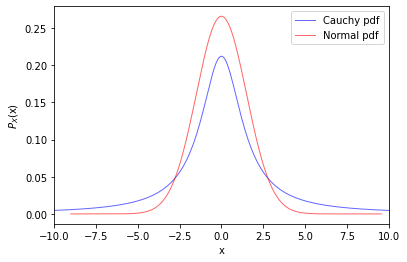

In [13]:
cauchy_dobj = sp.cauchy(0,1.5)
norm_dobj = sp.norm(0,1.5)

x1 = np.linspace(cauchy_dobj.ppf(0.01), cauchy_dobj.ppf(0.99), 1000)
x2 = np.linspace(norm_dobj.ppf(0.000000001), norm_dobj.ppf(0.9999999999), 1000)

plt.plot(x1, cauchy_dobj.pdf(x1),lw=1, color='b',alpha=0.6,label="Cauchy pdf" )
plt.plot(x2, norm_dobj.pdf(x2),lw=1, color='r',alpha=0.6,label="Normal pdf" )
plt.legend()
plt.xlim([-10, 10])
plt.xlabel('x')
plt.ylabel(r'$P_{X}$' + '(x)')
plt.show()

# Q3

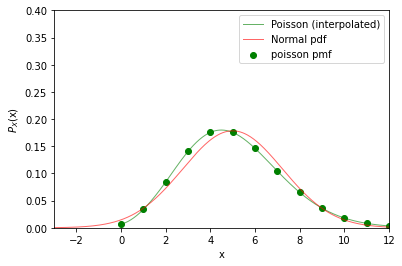

In [39]:
poisson_dobj = sp.poisson


x1 = np.arange(poisson_dobj.ppf(0.0001, 5), poisson_dobj.ppf(0.99998, 5))
plt.scatter(x1, poisson_dobj.pmf(x1,5),lw=1, color='g',label="poisson pmf" )
interpolate_func = interp1d(x1, poisson_dobj.pmf(x1,5), kind='cubic')
x1_cont = np.linspace(poisson_dobj.ppf(0.001, 5), poisson_dobj.ppf(0.9999, 5), 1000)
plt.plot(x1_cont, interpolate_func(x1_cont), lw=1, color='g',alpha=0.6,label="Poisson (interpolated)" )


norm_dobj = sp.norm(5,np.sqrt(5))
x2 = np.linspace(norm_dobj.ppf(0.000000001), norm_dobj.ppf(0.9999999999), 1000)
plt.plot(x2, norm_dobj.pdf(x2),lw=1, color='r',alpha=0.6,label="Normal pdf" )

plt.legend()
plt.xlim([-3, 12])
plt.ylim([0, 0.4])
plt.xlabel('x')
plt.ylabel(r'$P_{X}$' + '(x)')
plt.show()

# Q4

In [5]:
data = [0.8920, 0.881, 0.8913, 0.9837, 0.8958]   
delta = [0.00044, 0.009, 0.00032, 0.00048, 0.00045] 

wm = 0 
inv_unc = 0 

for x, e in zip(data, delta):
	wm += x/(e**2)
	inv_unc += 1/(e**2)


wm = wm/inv_unc
unc = math.sqrt(1/inv_unc)

print("Weighted Mean Lifetime : {} (in units of 10^(-10)s) ".format( wm)) 
print("Uncertainity : {} (in units of 10^(-10)s) ".format(unc) )


Weighted Mean Lifetime : 0.9089185199574897 (in units of 10^(-10)s) 
Uncertainity : 0.00020318737026848627 (in units of 10^(-10)s) 


# Q5

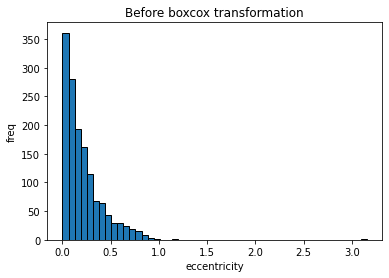

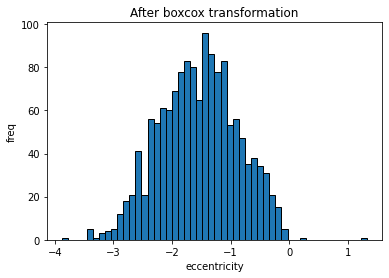

In [27]:
ecc = []
df = pd.read_csv('Data_Q5.csv')
df = df.dropna(subset=['eccentricity'])
ecc = df['eccentricity'].to_list()
new_ecc = []
for e in ecc:
    if(e!=0):
        new_ecc.append(e)

ecc = new_ecc
plt.hist(ecc, bins=50, edgecolor='black')
plt.title('Before boxcox transformation')
plt.xlabel('eccentricity')
plt.ylabel('freq')
plt.show()


boxcox, _ = sp.boxcox(ecc)
plt.hist(boxcox, bins=50, edgecolor='black')
plt.title('After boxcox transformation')
plt.xlabel('eccentricity')
plt.ylabel('freq')
plt.show()

# The End